# Stochastik und die Überraschungen der Unwissenden
Einfache Zusammenhänge viel zitierter Größen

Zunächst ein paar Begriffe:

In [1]:
psens = 0.8 # Ansprechen des Tests auf Merkmal (Sensitivität)
pspez = 0.97 # Nicht-Ansprechen des Tests bei Nicht-Merkmal (Spezifität)
pinzi = 100/100000 # Vorkommen des Merkmals (Inzidenz)

Damit ergeben sich 4 verschiedene Kombinationen aus Merkmal und Testresultat mit den Wahrscheinlichkeiten:

In [2]:
pinzi * psens # richtig positiv

0.0008

In [3]:
pinzi * (1-psens) # falsch negativ

0.00019999999999999996

In [4]:
(1-pinzi) * pspez # richtig negativ

0.96903

In [5]:
(1-pinzi) * (1-pspez) # falsch positiv

0.029970000000000028

In [6]:
(1-pinzi) * (1-pspez) / ( pinzi * psens + (1-pinzi) * (1-pspez) ) # falsch positiv falls positives Resultat

0.9740006499837505

Autsch! "Überraschenderweise" findet ein nicht-perfekter Test eine seltene Nadel im Heuhaufen schlechter, wenn sie seltener (also der Haufen größer) ist, und liegt häufiger falsch. Dies illustriert auch der folgende Graph: Wie hängt die Wahrscheinlichkeit eines falschen Resultats unter den positiven Resultaten von der Häufigkeit des Merkmals ab:

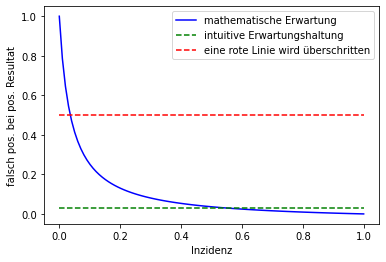

In [9]:
import numpy as np
import matplotlib.pyplot as plt
Pinzi = np.linspace(0, 1, 100) # Inzidenzen von 0 bis 100%
Pospos = (1-Pinzi) * (1-pspez) / ( Pinzi * psens + (1-Pinzi) * (1-pspez) ) # falsch positiv falls positives Resultat
Wrongpos = np.full_like(Pospos, 1-pspez) # falsche Erwartungshaltung
Wronglim = np.full_like(Pospos, 0.5) # Limit der politischen Toleranz
plt.plot(Pinzi, Pospos, 'b-', label='mathematische Erwartung')
plt.plot(Pinzi, Wrongpos, 'g--', label='intuitive Erwartungshaltung')
plt.plot(Pinzi, Wronglim, 'r--', label='eine rote Linie wird überschritten')
plt.xlabel('Inzidenz')
plt.ylabel('falsch pos. bei pos. Resultat')
plt.legend()

"Überraschenderweise" wird die Wahrscheinlichkeit eines falsch positiven Resultates unter den positiven Resultaten also größer (senkrechte Achse), wenn die Inzidenz kleiner wird (waagerechte Achse), und geht schießlich gegen 100%, wenn die Inzidenz gegen 0 geht - unabhängig von der Testqualität. Insbesondere übersteigt sie die falsche Erwartungshaltung bei kleinen Inzidenzen ziemlich schnell, bei sehr kleinen Inzidenzen auch die 50% ("wahrscheinlicher falsch als richtig").